In [1]:
!pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json


In [7]:
!kaggle datasets download -d camnugent/california-housing-prices

california-housing-prices.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!unzip california-housing-prices.zip

Archive:  california-housing-prices.zip
  inflating: housing.csv             


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv("housing.csv")

In [11]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [17]:
data.dropna(inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [21]:
from sklearn.model_selection import train_test_split

x= data.drop(['median_house_value'], axis=1)
y=data['median_house_value']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [24]:
train_data=X_train.join(y_train)

In [30]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15828,-122.43,37.75,52.0,2700.0,595.0,1181.0,575.0,3.5750,NEAR BAY,396800.0
16540,-121.22,37.79,38.0,2152.0,451.0,1320.0,457.0,2.5025,INLAND,101900.0
4360,-118.37,34.09,31.0,2697.0,706.0,1059.0,689.0,2.8942,<1H OCEAN,500001.0
16057,-122.49,37.76,52.0,2245.0,425.0,1091.0,409.0,3.5909,NEAR BAY,331200.0
18940,-122.06,38.27,14.0,6920.0,996.0,3196.0,978.0,5.0672,INLAND,171300.0
...,...,...,...,...,...,...,...,...,...,...
6789,-118.16,34.09,52.0,1722.0,448.0,1122.0,425.0,3.1204,<1H OCEAN,224000.0
8297,-118.14,33.76,50.0,2960.0,761.0,1179.0,718.0,3.5214,NEAR OCEAN,398100.0
4162,-118.19,34.11,38.0,1158.0,309.0,1051.0,322.0,2.2860,<1H OCEAN,169300.0
14124,-117.08,32.75,20.0,1886.0,586.0,1134.0,525.0,1.5029,NEAR OCEAN,100000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

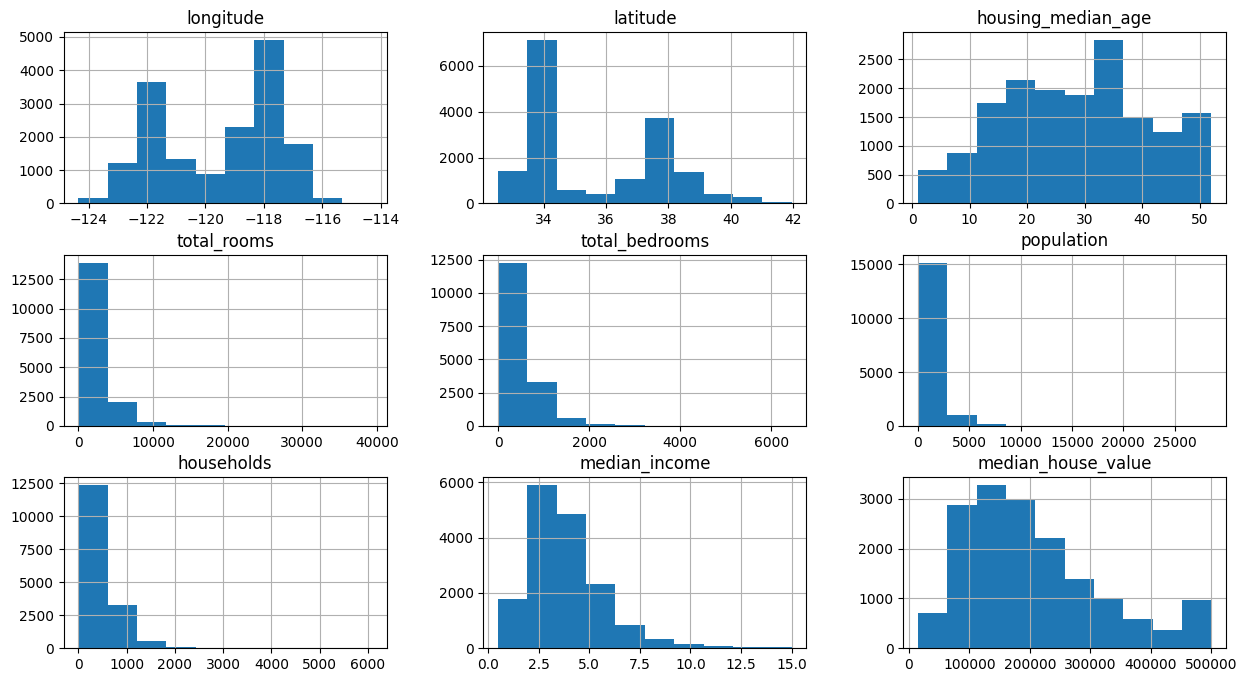

In [31]:
train_data.hist(figsize=(15,8))

In [35]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

In [36]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7234
INLAND        5228
NEAR OCEAN    2071
NEAR BAY      1809
ISLAND           4
Name: count, dtype: int64

In [37]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
15828,False,False,False,True,False
16540,False,True,False,False,False
4360,True,False,False,False,False
16057,False,False,False,True,False
18940,False,True,False,False,False
...,...,...,...,...,...
6789,True,False,False,False,False
8297,False,False,False,False,True
4162,True,False,False,False,False
14124,False,False,False,False,True


In [38]:
train_data.join(pd.get_dummies(train_data.ocean_proximity))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
15828,-122.43,37.75,52.0,7.901377,6.390241,7.074963,6.356108,3.5750,NEAR BAY,396800.0,False,False,False,True,False
16540,-121.22,37.79,38.0,7.674617,6.113682,7.186144,6.126869,2.5025,INLAND,101900.0,False,True,False,False,False
4360,-118.37,34.09,31.0,7.900266,6.561031,6.966024,6.536692,2.8942,<1H OCEAN,500001.0,True,False,False,False,False
16057,-122.49,37.76,52.0,7.716906,6.054439,6.995766,6.016157,3.5909,NEAR BAY,331200.0,False,False,False,True,False
18940,-122.06,38.27,14.0,8.842316,6.904751,8.069968,6.886532,5.0672,INLAND,171300.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6789,-118.16,34.09,52.0,7.451822,6.107023,7.023759,6.054439,3.1204,<1H OCEAN,224000.0,True,False,False,False,False
8297,-118.14,33.76,50.0,7.993282,6.635947,7.073270,6.577861,3.5214,NEAR OCEAN,398100.0,False,False,False,False,True
4162,-118.19,34.11,38.0,7.055313,5.736572,6.958448,5.777652,2.2860,<1H OCEAN,169300.0,True,False,False,False,False
14124,-117.08,32.75,20.0,7.542744,6.375025,7.034388,6.265301,1.5029,NEAR OCEAN,100000.0,False,False,False,False,True


In [40]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [41]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
15828,-122.43,37.75,52.0,7.901377,6.390241,7.074963,6.356108,3.5750,396800.0,False,False,False,True,False
16540,-121.22,37.79,38.0,7.674617,6.113682,7.186144,6.126869,2.5025,101900.0,False,True,False,False,False
4360,-118.37,34.09,31.0,7.900266,6.561031,6.966024,6.536692,2.8942,500001.0,True,False,False,False,False
16057,-122.49,37.76,52.0,7.716906,6.054439,6.995766,6.016157,3.5909,331200.0,False,False,False,True,False
18940,-122.06,38.27,14.0,8.842316,6.904751,8.069968,6.886532,5.0672,171300.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6789,-118.16,34.09,52.0,7.451822,6.107023,7.023759,6.054439,3.1204,224000.0,True,False,False,False,False
8297,-118.14,33.76,50.0,7.993282,6.635947,7.073270,6.577861,3.5214,398100.0,False,False,False,False,True
4162,-118.19,34.11,38.0,7.055313,5.736572,6.958448,5.777652,2.2860,169300.0,True,False,False,False,False
14124,-117.08,32.75,20.0,7.542744,6.375025,7.034388,6.265301,1.5029,100000.0,False,False,False,False,True


<Axes: >

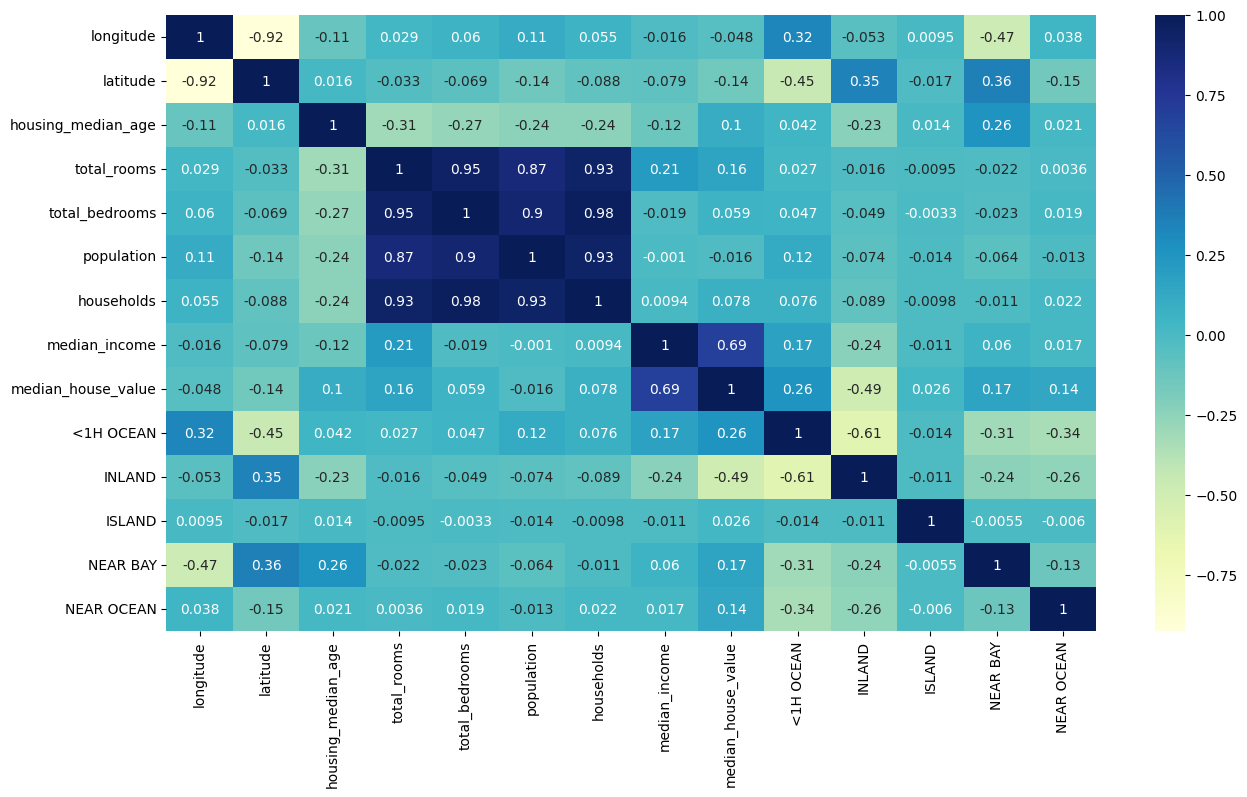

In [43]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

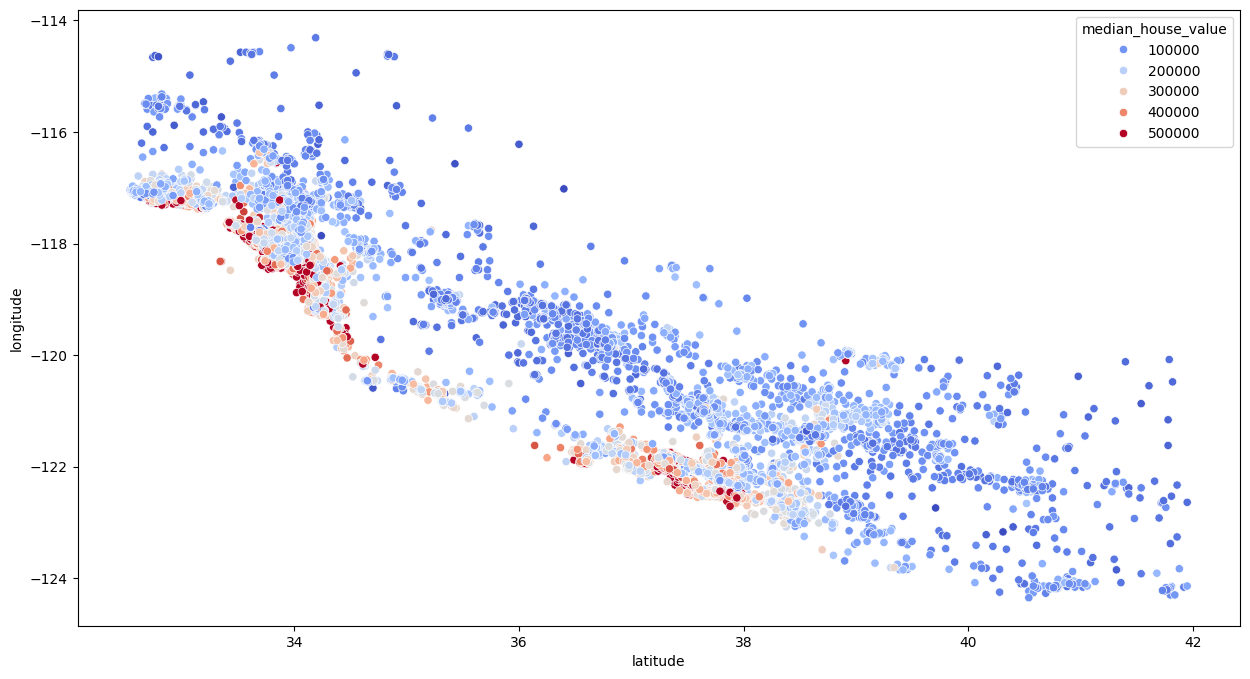

In [45]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [47]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_room']=train_data['total_rooms']/train_data['households']

<Axes: >

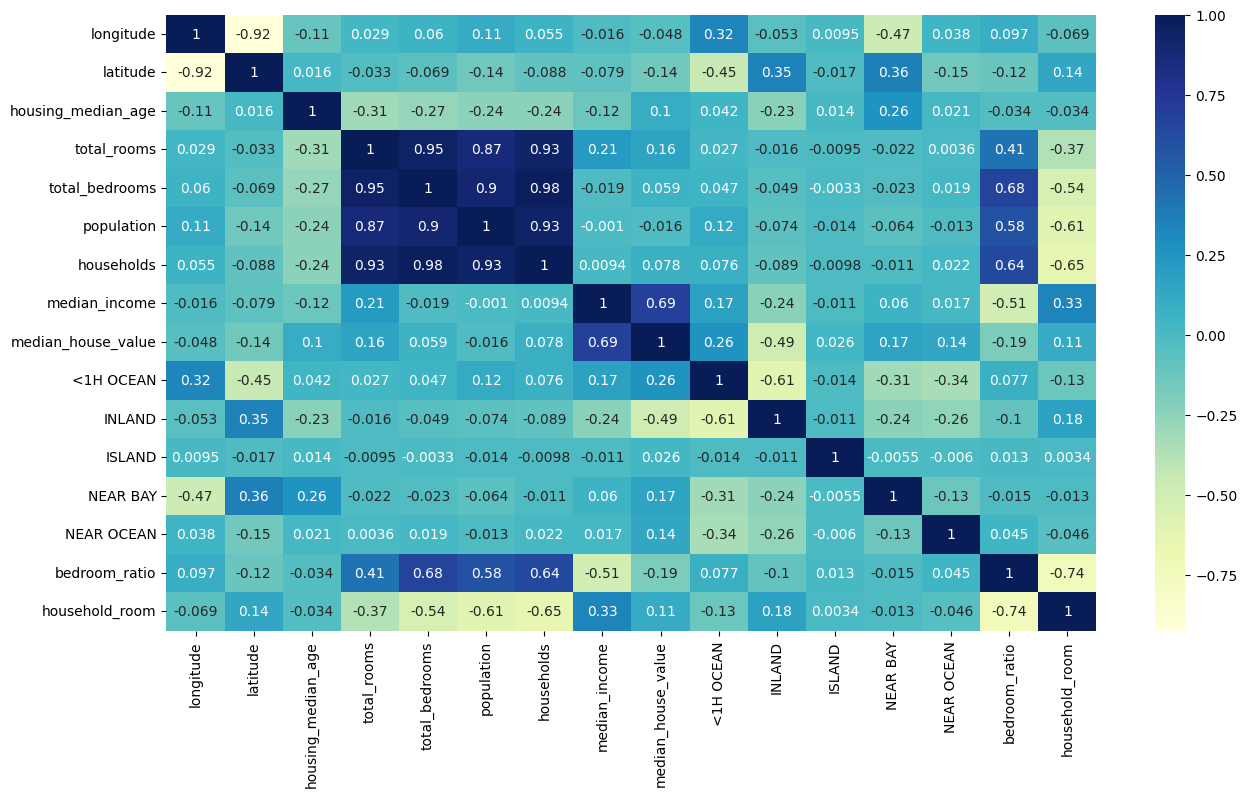

In [48]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")


In [54]:
from sklearn.linear_model import LinearRegression
X_train = train_data.drop(['median_house_value'],axis=1)
y_train = train_data['median_house_value']
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [58]:
test_data=X_test.join(y_test)
test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)
test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_room']=test_data['total_rooms']/test_data['households']
X_test = test_data.drop(['median_house_value'],axis=1)
y_test = test_data['median_house_value']

In [57]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_room
9417,-122.48,37.85,42.0,8.747987,7.176255,7.648263,7.095064,6.4752,500001.0,False,False,False,True,False,0.820332,1.232968
12997,-121.26,38.68,13.0,8.356320,6.429719,7.575072,6.434547,5.2051,167400.0,False,True,False,False,False,0.769444,1.298665
15845,-122.43,37.75,52.0,7.676010,6.150603,6.870053,6.196444,3.7750,325900.0,False,False,False,True,False,0.801276,1.238777
17382,-120.41,34.96,21.0,7.481556,5.575949,6.586172,5.472271,4.6500,152500.0,True,False,False,False,False,0.745293,1.367176
10295,-117.81,33.86,18.0,4.897840,3.401197,4.564348,3.178054,3.5625,235000.0,True,False,False,False,False,0.694428,1.541144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18719,-122.38,40.61,14.0,8.470940,7.033506,7.650645,6.978214,1.7227,105000.0,False,True,False,False,False,0.830310,1.213912
1513,-122.06,37.91,15.0,8.593043,7.260523,7.665753,7.161622,4.1612,232800.0,False,False,False,True,False,0.844930,1.199874
6502,-118.05,34.08,25.0,8.499029,7.260523,8.513988,7.165493,2.7254,143500.0,True,False,False,False,False,0.854277,1.186105
15315,-117.38,33.20,26.0,7.264030,5.958425,6.882437,5.762051,1.3903,184400.0,False,False,False,False,True,0.820264,1.260667


In [59]:
reg.score(X_test,y_test)

0.6669542360510725